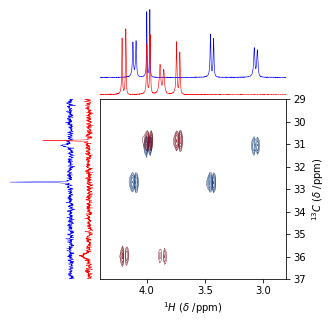

In [6]:
#! /usr/bin/env python
# Create a contour plot of a 2D Bruker spectrum

import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.gridspec import GridSpec

# MAKE SURE THAT THE NUMBER OF FILENAMES, COLOUR, LIMITS, OFFSETS AND SCALE ARE SAME
# WARNING - CHECK THE AXIS LIMITS OF THE PLOTS (SPECIALLY PROJECTIONS) INDIVIDUALLY...
# ...IF PLOTTING PHASE SENSITIVE DATA THE AXIS NEEDS TO BE REVERSED


# File names - collect filenames for 2D NMR and 1D NMR (both dimension)
fname2D= ["C:/Users/User/Desktop/NMR/500/AS-7-96-500/11/pdata/1","C:/Users/User/Desktop/NMR/500/AS-7-96-500/18/pdata/1"]
fname_1H=["C:/Users/User/Desktop/NMR/500/AS-7-96-500/8/pdata/1", "C:/Users/User/Desktop/NMR/500/AS-7-96-500/15/pdata/1"]
fname_13C=["C:/Users/User/Desktop/NMR/500/AS-7-96-500/10/pdata/1","C:/Users/User/Desktop/NMR/500/AS-7-96-500/17/pdata/1"]

# Plot colours
colors_list = ['blue', 'red'] # Colours for projections
cmap = [matplotlib.cm.Blues_r, matplotlib.cm.Reds_r]# Contour map (colors to use for contours)

# Plot limits (for both dimension) NOTE- goes higher to lower because origin on NMR axis is reversed
limit_1H = [4.4,2.8]
limit_13C = [37,29]

# Plot offsets - if uncertain, turn axis for each plot 'on' and check the axis ticks
offset_1H = [0.2e10, 0]
offset_13C = [-8e9, 0]

# Plot scale up (1 for default) - gets multiplies with the 1D data to increase scale
scale_1H = [0.8, 1]
scale_13C = [2,2]

# Label for x and y axis
label_x = '$^1H$'+' '+'$(\delta$'+' '+'/ppm)'
label_y = '$^{13}C$'+' '+'$(\delta$'+' '+'/ppm)'

# Create the figure subplots
fig = plt.figure(figsize=(5,5),constrained_layout=False)
gs = GridSpec(3, 3, figure=fig, wspace=0.002, hspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1:,0])
ax4 = fig.add_subplot(gs[1:,1:])

ax1.axis('off') # turnoff the topleft corner plot

# Plot 2D data (called ax4)      
for f,c in zip(fname2D, cmap):
    # Grab data
    dic, data = ng.bruker.read_pdata(f, read_procs=1, scale_data=1)
    contour_start = data.std()*6 # contours will start from 6 times the standard deviation of data
    cl = contour_start*1.6 ** np.arange(10) #There will 10 contour lines
        
    # Make universal dictionary to grab axis data
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic, dim=1)
    uc1 = ng.fileiobase.uc_from_udic(udic, dim=0)
    x0, x1 = uc0.ppm_limits()
    y0, y1 = uc1.ppm_limits()
    
    # Plot data - plotting absolute data to remove any phase information
    # Negative HSQC contours were difficult to plot because 'contour' woulddn't form properly... issue to levels
    ax4.contour(abs(data), cl, cmap=c, extent=(x0,x1,y0,y1), linewidths=0.4)

# Zoom in the region of interest
ax4.set_xlim(limit_1H[0],limit_1H[1])
ax4.set_ylim(limit_13C[0],limit_13C[1])

# Decorate the axis
ax4.tick_params(labelleft=False, labelright=True, left=False, right=True)
ax4.set_xlabel(label_x)
ax4.set_ylabel(label_y)
ax4.yaxis.set_label_position("right")

# Plot 1H data  
for f,c,offset,scale in zip(fname_1H, colors_list, offset_1H, scale_1H):
    # Grab data
    dic, data = ng.bruker.read_pdata(f)
       
    # Make universal dictionary to grab axis data
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic)
    
    # Plot data
    ax2.plot(uc0.ppm_scale(),(data*scale)+offset, c, linewidth =0.6)

# Zoom in the region of interest (same as 2D data)
ax2.set_xlim(limit_1H[0],limit_1H[1])
ax2.set_ylim(0,1e10)
ax2.axis('off')

# Plot 13C data    
for f,c,offset,scale in zip(fname_13C, colors_list, offset_13C, scale_13C):
    # Grab data
    dic, data = ng.bruker.read_pdata(f)
       
    # Make universal dictionary to grab axis data
    udic = ng.bruker.guess_udic(dic, data)
    uc0 = ng.fileiobase.uc_from_udic(udic)
    
    # Plot data
    ax3.plot((data*scale)+offset,uc0.ppm_scale(), c, linewidth =0.4)

# Zoom in the region of interest (same as 2D data)
ax3.set_ylim(limit_13C[0],limit_13C[1])
ax3.set_xlim(-3.6e10,5e9)
ax3.axis("off")

plt.show()

fig.savefig('2D NMR ovrlay MS124.png', dpi=200, bbox_inches='tight', pad_inches=0)
